# **Team Assignment**

The problem we are trying to solve is to understand the behavior of hotel customers and group them
accordingly. This way, we can better advise the hotel owner on which groups of customers are worth
pursuing in order for hotels to remain profitable. We will give hotel owners better insights on how to
market and run promotions.

In [ ]:
!pip install xlrd
!pip install openpyxl
!pip install scikit-plot
!pip install mlxtend  

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import numpy as np

# for distance and h-clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
import scikitplot as skplt

In [ ]:
df = pd.read_excel('HotelCustomersDataset.xlsx')

In [ ]:
df.shape

(83590, 31)

In [ ]:
df.describe().T


In [ ]:
# Replacing impossible values of some variables
# Age
df.loc[df['Age'] < 0, 'Age'] = np.nan
df.loc[df['Age'] > 100, 'Age'] = np.nan
# AverageLeadTime
df.loc[df['AverageLeadTime'] < 0, 'AverageLeadTime'] = np.nan
# DaysSinceLastStay
df.loc[df['DaysSinceLastStay'] < 0, 'DaysSinceLastStay'] = np.nan
# DaysSinceFirstStay
df.loc[df['DaysSinceFirstStay'] < 0, 'DaysSinceFirstStay'] = np.nan

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,83590.0,41795.500000,24130.498838,1.0,20898.25,41795.5,62692.750,83590.00
Age,79786.0,45.402401,16.543028,0.0,34.00,46.0,57.000,96.00
DaysSinceCreation,83590.0,453.640902,313.390291,0.0,177.00,397.0,723.000,1095.00
AverageLeadTime,83580.0,66.204068,87.761161,0.0,0.00,29.0,103.000,588.00
LodgingRevenue,83590.0,298.802087,372.851892,0.0,59.00,234.0,402.000,21781.00
OtherRevenue,83590.0,67.589132,114.327776,0.0,2.00,38.5,87.675,7730.25
BookingsCanceled,83590.0,0.002022,0.066770,0.0,0.00,0.0,0.000,9.00
BookingsNoShowed,83590.0,0.000634,0.029545,0.0,0.00,0.0,0.000,3.00
BookingsCheckedIn,83590.0,0.794617,0.695778,0.0,1.00,1.0,1.000,66.00
PersonsNights,83590.0,4.649133,4.567673,0.0,1.00,4.0,6.000,116.00


In [ ]:
# Imputing the Age
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

In [ ]:
# Imputing AverageLeadTime
mean_AverageLeadTime = df['AverageLeadTime'].mean()
df['AverageLeadTime'] = df['AverageLeadTime'].fillna(mean_AverageLeadTime)

In [ ]:
# Imputing DaysSinceLastStay
mean_DaysSinceLastStay = df['DaysSinceLastStay'].mean()
df['DaysSinceLastStay'] = df['DaysSinceLastStay'].fillna(mean_DaysSinceLastStay)

In [ ]:
# Imputing DaysSinceFirstStay
mean_DaysSinceFirstStay = df['DaysSinceFirstStay'].mean()
df['DaysSinceFirstStay'] = df['DaysSinceFirstStay'].fillna(mean_DaysSinceFirstStay)

In [ ]:
print(df.shape)

(83590, 31)


In [ ]:
# dropping columns
del df['NameHash']
del df['DocIDHash']

In [ ]:
sh = df.shape
print("There are {} rows and {} columns.".format(sh[0], sh[1]))

There are 83590 rows and 29 columns.


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,83590.0,41795.500000,24130.498838,1.0,20898.25,41795.500000,62692.750,83590.00
Age,83590.0,45.402401,16.162222,0.0,34.00,45.402401,56.000,96.00
DaysSinceCreation,83590.0,453.640902,313.390291,0.0,177.00,397.000000,723.000,1095.00
AverageLeadTime,83590.0,66.204068,87.755912,0.0,0.00,29.000000,103.000,588.00
LodgingRevenue,83590.0,298.802087,372.851892,0.0,59.00,234.000000,402.000,21781.00
OtherRevenue,83590.0,67.589132,114.327776,0.0,2.00,38.500000,87.675,7730.25
BookingsCanceled,83590.0,0.002022,0.066770,0.0,0.00,0.000000,0.000,9.00
BookingsNoShowed,83590.0,0.000634,0.029545,0.0,0.00,0.000000,0.000,3.00
BookingsCheckedIn,83590.0,0.794617,0.695778,0.0,1.00,1.000000,1.000,66.00
PersonsNights,83590.0,4.649133,4.567673,0.0,1.00,4.000000,6.000,116.00


In [ ]:
# Computing the number of unique values of Nationalities 
df['Nationality'].nunique()

188

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   83590 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   AverageLeadTime       83590 non-null  float64
 5   LodgingRevenue        83590 non-null  float64
 6   OtherRevenue          83590 non-null  float64
 7   BookingsCanceled      83590 non-null  int64  
 8   BookingsNoShowed      83590 non-null  int64  
 9   BookingsCheckedIn     83590 non-null  int64  
 10  PersonsNights         83590 non-null  int64  
 11  RoomNights            83590 non-null  int64  
 12  DaysSinceLastStay     83590 non-null  float64
 13  DaysSinceFirstStay    83590 non-null  float64
 14  DistributionChannel   83590 non-null  object 
 15  MarketSegment      

In [ ]:
# Replacing three variables object to category 
df['Nationality'] = df['Nationality'].astype('category')
df['DistributionChannel'] = df['DistributionChannel'].astype('category')
df['MarketSegment'] = df['MarketSegment'].astype('category')

In [ ]:
# Checking our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    83590 non-null  int64   
 1   Nationality           83590 non-null  category
 2   Age                   83590 non-null  float64 
 3   DaysSinceCreation     83590 non-null  int64   
 4   AverageLeadTime       83590 non-null  float64 
 5   LodgingRevenue        83590 non-null  float64 
 6   OtherRevenue          83590 non-null  float64 
 7   BookingsCanceled      83590 non-null  int64   
 8   BookingsNoShowed      83590 non-null  int64   
 9   BookingsCheckedIn     83590 non-null  int64   
 10  PersonsNights         83590 non-null  int64   
 11  RoomNights            83590 non-null  int64   
 12  DaysSinceLastStay     83590 non-null  float64 
 13  DaysSinceFirstStay    83590 non-null  float64 
 14  DistributionChannel   83590 non-null  category
 15  Ma

## EDA


<AxesSubplot:title={'center':'Correlation Between Features'}>

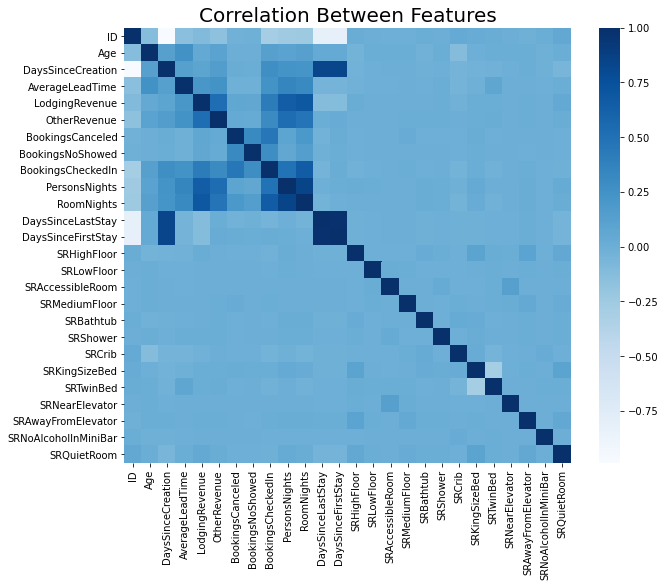

In [ ]:
# Correlation with all variables 
df_corr = df.corr()
plt.figure(figsize=(10,8))
plt.title('Correlation Between Features', fontsize=20)
sns.heatmap(df_corr,cmap="Blues")

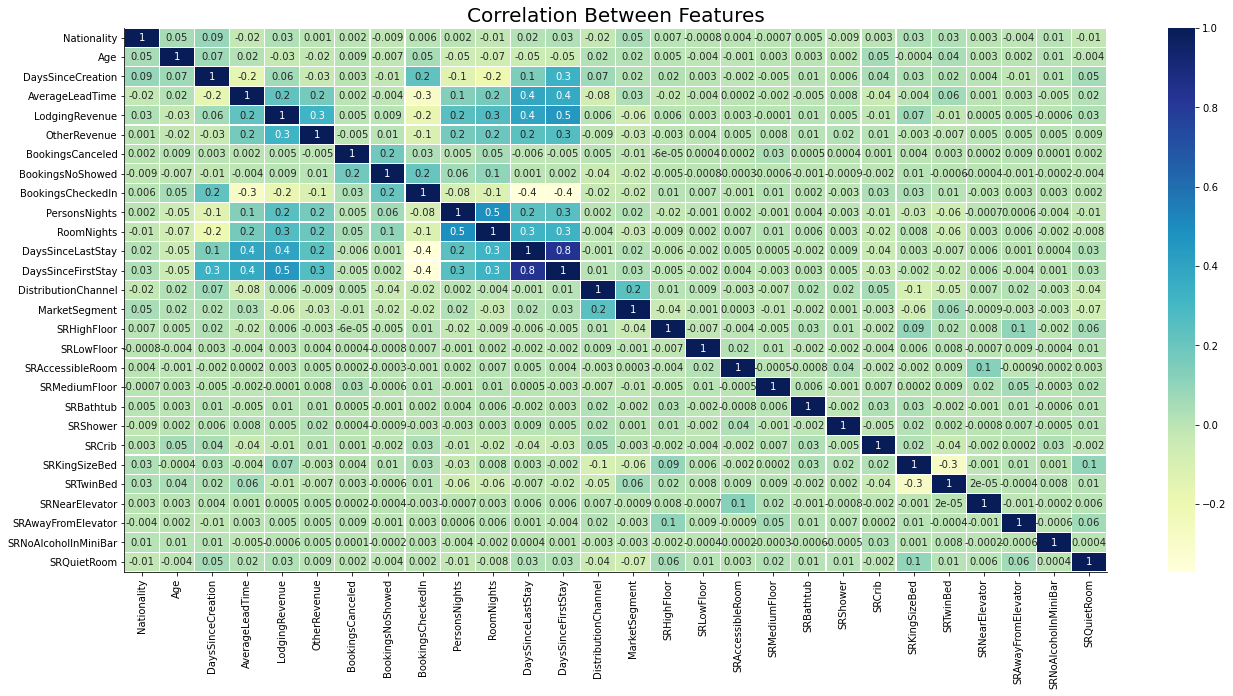

In [ ]:
# Correlation with all variables with actual coefficients 
plt.figure(figsize=(22, 10))
df_corr = df.drop('ID', axis=1)
corr = df_corr.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu", annot=True, fmt='.1g')
plt.title('Correlation Between Features', fontsize=20)
sns.despine();

In [ ]:
# Creating a subset dataset with only the requests made by the customers
df1 = df[['ID','SRHighFloor','SRQuietRoom','SRLowFloor','SRAccessibleRoom','SRMediumFloor','SRBathtub','SRShower','SRCrib','SRKingSizeBed','SRTwinBed','SRNearElevator','SRAwayFromElevator','SRNoAlcoholInMiniBar']]

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'SRKingSizeBed'),
  Text(1, 0, 'SRTwinBed'),
  Text(2, 0, 'SRQuietRoom'),
  Text(3, 0, 'SRHighFloor'),
  Text(4, 0, 'SRCrib')])

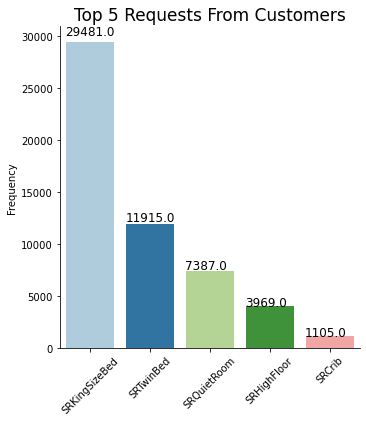

In [ ]:
#Request Distribution
df1 = pd.DataFrame(df[['SRHighFloor','SRQuietRoom','SRLowFloor','SRAccessibleRoom','SRMediumFloor','SRBathtub','SRShower','SRCrib','SRKingSizeBed','SRTwinBed','SRNearElevator','SRAwayFromElevator','SRNoAlcoholInMiniBar']].T.sum(axis=1))
df1.columns =['Frequency'] 
type(df1)
df1 = df1.sort_values('Frequency',ascending=False)[:5]

p1 = sns.catplot(data = df1, x= df1.index, y = df1['Frequency'],kind='bar',ci=None,palette='Paired')
plt.title('Center Title')
plt.title('Top 5 Requests From Customers', fontsize = 17)

ax = p1.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{}'.format(p.get_height()),
            color='black', 
            rotation='horizontal', 
            size='large')
    
plt.xticks(rotation = 45)


In [ ]:
# Checking our sub dataset 
df.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,...,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,41795.500000,45.402401,453.640902,66.204068,298.802087,67.589132,0.002022,0.000634,0.794617,4.649133,...,0.000873,0.002847,0.001711,0.013219,0.352686,0.142541,0.000335,0.003505,0.000120,0.088372
std,24130.498838,16.162222,313.390291,87.755912,372.851892,114.327776,0.066770,0.029545,0.695778,4.567673,...,0.029539,0.053284,0.041326,0.114213,0.477809,0.349606,0.018299,0.059101,0.010937,0.283837
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20898.250000,34.000000,177.000000,0.000000,59.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41795.500000,45.402401,397.000000,29.000000,234.000000,38.500000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62692.750000,56.000000,723.000000,103.000000,402.000000,87.675000,0.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,96.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Frequency of Nationalities')

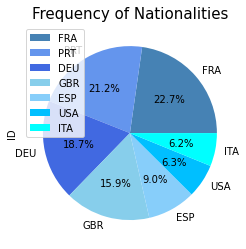

In [ ]:
# Market Analysis of Customers by Nationality
dfn = df.groupby("Nationality")["ID"].count()
dfn = pd.DataFrame(dfn)
dfn =dfn.sort_values('ID',ascending=False)[:7]
dfn.plot.pie(autopct="%.1f%%",subplots=True, colors = ["steelblue", "cornflowerblue", "royalblue", "skyblue", "lightskyblue", "deepskyblue", "aqua"])
plt.title("Frequency of Nationalities", fontsize = 15)

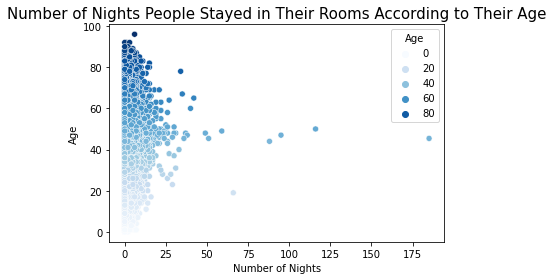

In [ ]:
# Number of Nights People Stayed in Their Rooms According to Their Age
sns.scatterplot(x="RoomNights", y="Age",
              hue="Age",
              data=df, palette = "Blues")
plt.title('Number of Nights People Stayed in Their Rooms According to Their Age', fontsize = 15)
plt.xlabel('Number of Nights')
plt.ylabel('Age')
plt.show()

Sampling Data due to Computational Difficulty

In [ ]:
df_subset = df.sample(frac =.20, replace=False, random_state=820) 
df_subset.shape

(16718, 29)

In [ ]:
# Saving the subset file to be used for analysis locally
df_subset.to_excel('df_subset.xlsx')

# Association Rules


> Create Subset DataFrame (Category) for Association Rules

In [ ]:
# sub_data_frame for Association Rules with selected columns
df_Association_Rules = df_subset[['ID','RoomNights','Age','MarketSegment','Nationality']]

df_Association_Rules['Repeated Bookings'] = df_subset['PersonsNights']/df_subset['RoomNights']
#drop nan for Repeated Stays


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Because there are 0 recorded in PersonsNight & RoomNights
df_subset['PersonsNights'].unique()
df_subset['RoomNights'].unique()

# Focus on current customers
# drop nan for Repeated Stays

df_Association_Rules = df_Association_Rules[df_Association_Rules['Repeated Bookings'].notnull()]

In [ ]:
# Reset columns type
df_Association_Rules['Repeated Bookings'] = df_Association_Rules['Repeated Bookings'].astype('int')

In [ ]:
# Change Repeated Stays type
df_Association_Rules['Repeated Bookings'].astype('category')

# Create Repeated Stays Group
bins = [0,1,2,3,10]
labels = ['No Booking Yet','Book 1 Time','Book 2 Times','Book 3 Times and above']
df_Association_Rules['Repeated Bookings'] = pd.cut(df_Association_Rules['Repeated Bookings'], bins=bins, labels=labels, right=False)

In [ ]:
df_Association_Rules['Average Daily Price'] = df_subset['LodgingRevenue']/df_subset['PersonsNights']
# drop na for Average Daily Price
df_Association_Rules = df_Association_Rules[df_Association_Rules['Average Daily Price'].notnull()]

In [ ]:
# Reset Age column type from float to int
df_Association_Rules['Age'] = df_Association_Rules['Age'].astype('int')

In [ ]:
# Create 6 Nation Labels (Top 5 Nations and all Others)

top_5 = df_Association_Rules.loc[(df_Association_Rules['Nationality'] == 'PRT') | (df_Association_Rules['Nationality'] =='FRA')| (df_Association_Rules['Nationality'] =='DEU')| (df_Association_Rules['Nationality'] =='GBR')| (df_Association_Rules['Nationality'] =='ESP')]

other = df_Association_Rules.loc[(df_Association_Rules['Nationality'] != 'PRT') | (df_Association_Rules['Nationality'] !='FRA')| (df_Association_Rules['Nationality'] !='DEU')| (df_Association_Rules['Nationality'] !='GBR')| (df_Association_Rules['Nationality'] !='ESP')]
other['Nationality'] = 'Others Countries'

frames = [top_5,other]
df_Association_Rules = pd.concat(frames)

In [ ]:
# Relabel Market Segment
# Create 4 labels: Travel Agent, Groups, Corporate, and Others
labs3 = df_Association_Rules.loc[(df_Association_Rules['MarketSegment'] == 'Travel Agent/Operator') |(df_Association_Rules['MarketSegment'] == 'Groups') |(df_Association_Rules['MarketSegment'] == 'Corporate')]
labs1 = df_Association_Rules.loc[(df_Association_Rules['MarketSegment'] == 'Other') |(df_Association_Rules['MarketSegment'] == 'Direct') |(df_Association_Rules['MarketSegment'] == 'Corporate')]
labs1['MarketSegment'] = 'Other'

frames = [labs3,labs1]
df_Association_Rules = pd.concat(frames)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Create Age groups
bins= [0,18,40,60,150]
labels = ['Kid <17','Adult 18-39','Adult 40-59','Senior 60+']
df_Association_Rules['Age Group'] = pd.cut(df_Association_Rules['Age'], bins=bins, labels=labels, right=False)

In [ ]:
# Reset Age column type from float to int
df_Association_Rules['Average Daily Price'] = df_Association_Rules['Average Daily Price'].astype('int')

# Create Average Daily Price Group
# low : price < 100
# medium: price 100-250
# high: price > 250
bins= [0,100,250,2000]
labels = ['Low','Medium','High']
df_Association_Rules['Avg Daily Price'] = pd.cut(df_Association_Rules['Average Daily Price'], bins=bins, labels=labels, right=False)

In [ ]:
# Create RoomNights Group
df_Association_Rules['RoomNights'].unique()

bins = [0,2,4,15,200]
labels = ['Single Day', 'Weekend Trip','Holiday', 'Extended']
df_Association_Rules['Length of Stay'] = pd.cut(df_Association_Rules['RoomNights'], bins=bins, labels=labels, right=False)

In [ ]:
# Rename Market Segment Column
df_Association_Rules['Market Segment'] = df_Association_Rules['MarketSegment']

In [ ]:
# Create df with only category columns
df_AR = df_Association_Rules[['Age Group','Market Segment','Avg Daily Price','Nationality', 'Repeated Bookings', 'Length of Stay']]

In [ ]:
#df_AR.info()
sh = df_AR.shape
print("There are {} rows and {} columns.".format(sh[0], sh[1]))

There are 20653 rows and 6 columns.


> df_AR is the data frame we will futher use in the Association Rules Application

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# form df_AR into dataframe lists
dataset = df_AR.values.tolist()

dataset

te = TransactionEncoder()

te_ary = te.fit(dataset).transform(dataset)

df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Adult 18-39,Adult 40-59,Book 1 Time,Book 2 Times,Book 3 Times and above,Corporate,DEU,ESP,Extended,FRA,GBR,Groups,High,Holiday,Kid <17,Low,Medium,No Booking Yet,Other,Others Countries,PRT,Senior 60+,Single Day,Travel Agent/Operator,Weekend Trip
0,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True
1,False,True,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
2,True,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False
3,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False
4,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20648,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,True
20649,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,True
20650,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,True
20651,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,True,True,False,False


> Lotalty check
- Repeated Stays Group by Age Group, Nationality, Length of Stay

In [ ]:
# Loyal Check by Age 
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
# Loyal Check by Age 
dfl_a = df[['Adult 18-39','Adult 40-59','Book 1 Time','Kid <17','Senior 60+','Book 2 Times','Book 3 Times and above']]
frequent_itemsets = apriori(dfl_a, min_support=0.005, use_colnames=True)
from mlxtend.frequent_patterns import association_rules
rulesl_a = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
rulesl_a.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
17,(Book 3 Times and above),(Kid <17),0.128020,0.013848,0.005762,0.045008,3.250144,0.003989,1.032628
16,(Kid <17),(Book 3 Times and above),0.013848,0.128020,0.005762,0.416084,3.250144,0.003989,1.493331
11,(Book 3 Times and above),(Adult 40-59),0.128020,0.505399,0.084637,0.661120,1.308115,0.019935,1.459515
10,(Adult 40-59),(Book 3 Times and above),0.505399,0.128020,0.084637,0.167465,1.308115,0.019935,1.047379
19,(Senior 60+),(Book 2 Times),0.198373,0.630417,0.156103,0.786917,1.248249,0.031045,1.734458
18,(Book 2 Times),(Senior 60+),0.630417,0.198373,0.156103,0.247619,1.248249,0.031045,1.065453
6,(Adult 40-59),(Book 1 Time),0.505399,0.241369,0.143272,0.283483,1.174480,0.021284,1.058776
7,(Book 1 Time),(Adult 40-59),0.241369,0.505399,0.143272,0.593581,1.174480,0.021284,1.216973
2,(Book 2 Times),(Adult 18-39),0.630417,0.282380,0.189997,0.301382,1.067293,0.011979,1.027200
3,(Adult 18-39),(Book 2 Times),0.282380,0.630417,0.189997,0.672840,1.067293,0.011979,1.129669


Text(0.5, 1.0, 'Lift(Age --> Customer Loyalty)')

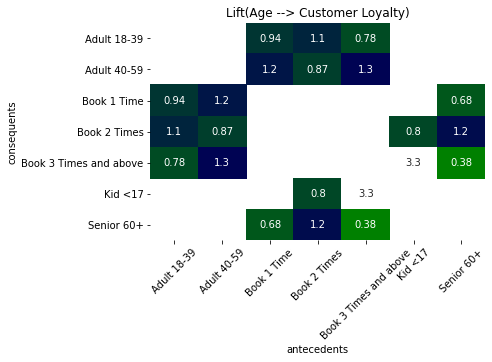

In [ ]:
# Heat Map
# Convert antecedents and consequents into strings
rulesl_a['antecedents'] = rulesl_a['antecedents'].apply(lambda a: ','.join(list(a)))
rulesl_a['consequents'] = rulesl_a['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rulesl_a.pivot(index='consequents', columns='antecedents',values='lift')

# Generate heatmap
sns.heatmap(support_table, annot=True, cbar=False, cmap='ocean')
plt.xticks(rotation = 45)
plt.title("Lift(Age --> Customer Loyalty)")

In [ ]:
# Loyal Check by Nation 
dfl_n = df[['DEU','ESP','FRA','GBR','Book 1 Time','Book 2 Times','Book 3 Times and above','Others Countries','PRT']]
frequent_itemsets = apriori(dfl_n, min_support=0.005, use_colnames=True)
from mlxtend.frequent_patterns import association_rules
rulesl_n = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
rulesl_n.sort_values(by='lift',ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(PRT),(Book 1 Time),0.099501,0.241369,0.038203,0.383942,1.590681,0.014186,1.231427
26,(Book 1 Time),(PRT),0.241369,0.099501,0.038203,0.158275,1.590681,0.014186,1.069825
11,(Book 3 Times and above),(ESP),0.128020,0.041786,0.008134,0.063540,1.520618,0.002785,1.023230
10,(ESP),(Book 3 Times and above),0.041786,0.128020,0.008134,0.194670,1.520618,0.002785,1.082761
7,(Book 1 Time),(ESP),0.241369,0.041786,0.013509,0.055968,1.339403,0.003423,1.015023
6,(ESP),(Book 1 Time),0.041786,0.241369,0.013509,0.323291,1.339403,0.003423,1.121059
17,(FRA),(Book 3 Times and above),0.089914,0.128020,0.013896,0.154550,1.207235,0.002385,1.031380
16,(Book 3 Times and above),(FRA),0.128020,0.089914,0.013896,0.108548,1.207235,0.002385,1.020902
20,(Book 2 Times),(GBR),0.630417,0.062364,0.044546,0.070661,1.133037,0.005230,1.008928
21,(GBR),(Book 2 Times),0.062364,0.630417,0.044546,0.714286,1.133037,0.005230,1.293541


Text(0.5, 1.0, 'Lift(Nationality --> Customer Loyalty)')

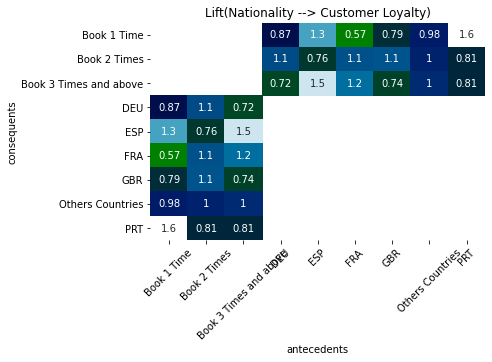

In [ ]:
# Heat Map
# Convert antecedents and consequents into strings
rulesl_n['antecedents'] = rulesl_n['antecedents'].apply(lambda a: ','.join(list(a)))
rulesl_n['consequents'] = rulesl_n['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rulesl_n.pivot(index='consequents', columns='antecedents',values='lift')

# Generate heatmap
sns.heatmap(support_table, annot=True, cbar=False, cmap='ocean')
plt.xticks(rotation = 45)
plt.title("Lift(Nationality --> Customer Loyalty)")

In [ ]:
# Loyal Check by Length of Stay
dfl_l = df[['Book 1 Time','Book 2 Times','Book 3 Times and above','Extended','Holiday','Single Day', 'Weekend Trip']]
frequent_itemsets = apriori(dfl_l, min_support=0.005, use_colnames=True)
from mlxtend.frequent_patterns import association_rules
rulesl_l = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
rulesl_l.sort_values(by='lift',ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Single Day),(Book 1 Time),0.183896,0.241369,0.076890,0.418115,1.732262,0.032503,1.303746
3,(Book 1 Time),(Single Day),0.241369,0.183896,0.076890,0.318556,1.732262,0.032503,1.197609
12,(Holiday),(Book 3 Times and above),0.321358,0.128020,0.049726,0.154739,1.208705,0.008586,1.031610
13,(Book 3 Times and above),(Holiday),0.128020,0.321358,0.049726,0.388427,1.208705,0.008586,1.109666
6,(Holiday),(Book 2 Times),0.321358,0.630417,0.221372,0.688865,1.092714,0.018783,1.187856
7,(Book 2 Times),(Holiday),0.630417,0.321358,0.221372,0.351152,1.092714,0.018783,1.045919
10,(Weekend Trip),(Book 2 Times),0.491841,0.630417,0.321503,0.653672,1.036888,0.011438,1.067148
11,(Book 2 Times),(Weekend Trip),0.630417,0.491841,0.321503,0.509985,1.036888,0.011438,1.037026
4,(Book 1 Time),(Weekend Trip),0.241369,0.491841,0.111993,0.463992,0.943377,-0.006722,0.948043
5,(Weekend Trip),(Book 1 Time),0.491841,0.241369,0.111993,0.227702,0.943377,-0.006722,0.982303


Text(0.5, 1.0, 'Lift(Length of Stay --> Customer Loyalty)')

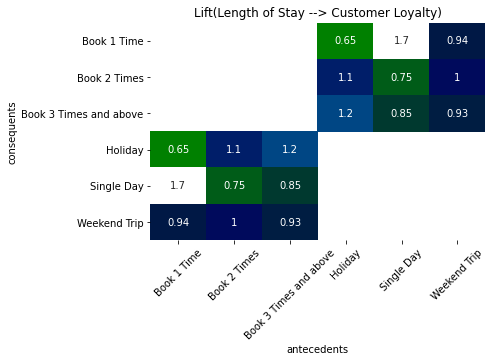

In [ ]:
# Heat Map
# Convert antecedents and consequents into strings
rulesl_l['antecedents'] = rulesl_l['antecedents'].apply(lambda a: ','.join(list(a)))
rulesl_l['consequents'] = rulesl_l['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rulesl_l.pivot(index='consequents', columns='antecedents',values='lift')

# Generate heatmap
sns.heatmap(support_table, annot=True, cbar=False, cmap='ocean')
plt.xticks(rotation = 45)
plt.title("Lift(Length of Stay --> Customer Loyalty)")

> Length of Stay & Influcing Factors
- Length of Stay by Age Group, MarketSegment,Average Dialy Price Group, Nationality

In [ ]:
# Loyalty Check by 3 Antecedents
# Check Custoemr by Booking 2 Times in AR
#dfl = df[['Adult 18-39','Adult 40-59','Book 1 Time'  ,'Book 2 Times','Book 3 Times and above','DEU','ESP','FRA','GBR','Kid and Teen 10-17','No Booking Yet','Others Countries','PRT','Senior 60+','Extended','Holiday','Single Day', 'Weekend Trip']]
# Generate frequent itemsets
dfl_3 = df[['Adult 18-39','Adult 40-59','Book 1 Time' ,'Book 2 Times','Book 3 Times and above','DEU','ESP','FRA','GBR','Kid <17','Others Countries','PRT','Senior 60+','Extended','Holiday','Single Day', 'Weekend Trip']]
frequent_itemsets = apriori(dfl_3, min_support=0.05, use_colnames=True)
#frequent_itemsets
from mlxtend.frequent_patterns import association_rules
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.00)
# Check Custoemr by Booking 2 Times
rules.loc[rules.consequents == {'Book 2 Times'},:].sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
182,"(Holiday, Senior 60+)",(Book 2 Times),0.064640,0.630417,0.053745,0.831461,1.318906,0.012995,2.192860
188,"(Weekend Trip, Senior 60+)",(Book 2 Times),0.111025,0.630417,0.088026,0.792848,1.257656,0.018034,1.784114
245,"(Weekend Trip, Senior 60+, Others Countries)",(Book 2 Times),0.070111,0.630417,0.055537,0.792127,1.256513,0.011338,1.777928
44,(Senior 60+),(Book 2 Times),0.198373,0.630417,0.156103,0.786917,1.248249,0.031045,1.734458
160,"(Senior 60+, Others Countries)",(Book 2 Times),0.127003,0.630417,0.099550,0.783835,1.243360,0.019485,1.709729
76,"(Holiday, Adult 18-39)",(Book 2 Times),0.088413,0.630417,0.064785,0.732749,1.162325,0.009048,1.382907
39,(FRA),(Book 2 Times),0.089914,0.630417,0.063671,0.708131,1.123275,0.006988,1.266265
36,(DEU),(Book 2 Times),0.077810,0.630417,0.054278,0.697573,1.106527,0.005225,1.222058
82,"(Weekend Trip, Adult 18-39)",(Book 2 Times),0.138285,0.630417,0.095967,0.693978,1.100823,0.008789,1.207700
46,(Holiday),(Book 2 Times),0.321358,0.630417,0.221372,0.688865,1.092714,0.018783,1.187856


In [ ]:
# Loyalty Check by 3 Antecedents
# Check Custoemr by Booking 3 Times and above in AR
# Generate frequent itemsets
dfl_3 = df[['Adult 18-39','Adult 40-59','Book 1 Time' ,'Book 2 Times','Book 3 Times and above','DEU','ESP','FRA','GBR','Kid <17','Others Countries','PRT','Senior 60+','Extended','Holiday','Single Day', 'Weekend Trip']]
frequent_itemsets = apriori(dfl_3, min_support=0.03, use_colnames=True)
#frequent_itemsets
from mlxtend.frequent_patterns import association_rules
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.00)
# Check Custoemr by Booking 2 Times
rules.loc[rules.consequents == {'Book 3 Times and above'},:].sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
190,"(Adult 40-59, Holiday)",(Book 3 Times and above),0.162252,0.12802,0.034135,0.210385,1.643374,0.013364,1.104310
185,"(Adult 40-59, Others Countries)",(Book 3 Times and above),0.311044,0.12802,0.053552,0.172167,1.344842,0.013732,1.053328
16,(Adult 40-59),(Book 3 Times and above),0.505399,0.12802,0.084637,0.167465,1.308115,0.019935,1.047379
196,"(Adult 40-59, Weekend Trip)",(Book 3 Times and above),0.236431,0.12802,0.038348,0.162195,1.266952,0.008080,1.040791
282,"(Holiday, Others Countries)",(Book 3 Times and above),0.204958,0.12802,0.032102,0.156627,1.223452,0.005863,1.033919
64,(Holiday),(Book 3 Times and above),0.321358,0.12802,0.049726,0.154739,1.208705,0.008586,1.031610
63,(Others Countries),(Book 3 Times and above),0.628625,0.12802,0.082603,0.131403,1.026421,0.002126,1.003894
288,"(Weekend Trip, Others Countries)",(Book 3 Times and above),0.308575,0.12802,0.037718,0.122234,0.954806,-0.001785,0.993409
66,(Weekend Trip),(Book 3 Times and above),0.491841,0.12802,0.058345,0.118626,0.926618,-0.004621,0.989341


In [ ]:
# Length of Stay by Age
dflen_a = df[['Extended','Holiday','Single Day', 'Weekend Trip','Adult 18-39','Adult 40-59','Kid <17','Senior 60+']]
frequent_itemsets = apriori(dflen_a, min_support=0.005, use_colnames=True)
from mlxtend.frequent_patterns import association_rules
ruleslen_a = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
ruleslen_a.sort_values(by='lift',ascending=False)

Text(0.5, 1.0, 'Lift(Age --> Length of Stay)')

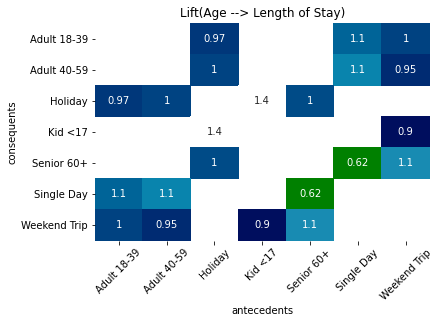

In [ ]:
# Heat Map
# Convert antecedents and consequents into strings
ruleslen_a ['antecedents'] = ruleslen_a ['antecedents'].apply(lambda a: ','.join(list(a)))
ruleslen_a ['consequents'] = ruleslen_a ['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = ruleslen_a .pivot(index='consequents', columns='antecedents',values='lift')

# Generate heatmap
sns.heatmap(support_table, annot=True, cbar=False, cmap='ocean')
plt.xticks(rotation = 45)
plt.title("Lift(Age --> Length of Stay)")

In [ ]:
# Length of Stay by Nationality
dflen_n = df[['DEU','ESP','FRA','GBR','Others Countries','PRT','Extended','Holiday','Single Day', 'Weekend Trip']]
frequent_itemsets = apriori(dflen_n, min_support=0.005, use_colnames=True)
from mlxtend.frequent_patterns import association_rules
ruleslen_n = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
ruleslen_n.sort_values(by='lift',ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,(PRT),(Single Day),0.099501,0.183896,0.037331,0.375182,2.040191,0.019033,1.306148
32,(Single Day),(PRT),0.183896,0.099501,0.037331,0.203002,2.040191,0.019033,1.129863
0,(DEU),(Holiday),0.077810,0.321358,0.031182,0.400747,1.247043,0.006177,1.132480
1,(Holiday),(DEU),0.321358,0.077810,0.031182,0.097032,1.247043,0.006177,1.021288
8,(Single Day),(ESP),0.183896,0.041786,0.009442,0.051343,1.228717,0.001758,1.010074
9,(ESP),(Single Day),0.041786,0.183896,0.009442,0.225956,1.228717,0.001758,1.054338
12,(Holiday),(FRA),0.321358,0.089914,0.035104,0.109236,1.214891,0.006209,1.021691
13,(FRA),(Holiday),0.089914,0.321358,0.035104,0.390415,1.214891,0.006209,1.113285
22,(Weekend Trip),(GBR),0.491841,0.062364,0.034184,0.069502,1.114458,0.003511,1.007671
23,(GBR),(Weekend Trip),0.062364,0.491841,0.034184,0.548137,1.114458,0.003511,1.124585


Text(0.5, 1.0, 'Lift(Nationality --> Length of Stay)')

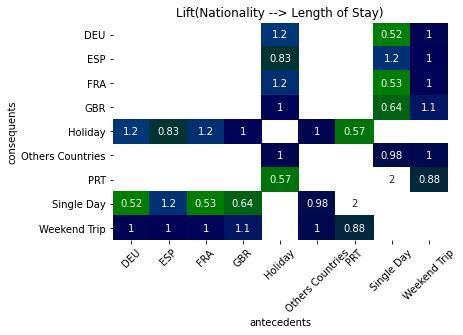

In [ ]:
# Heat Map
# Convert antecedents and consequents into strings
ruleslen_n['antecedents'] = ruleslen_n['antecedents'].apply(lambda a: ','.join(list(a)))
ruleslen_n['consequents'] = ruleslen_n['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = ruleslen_n.pivot(index='consequents', columns='antecedents',values='lift')

# Generate heatmap
sns.heatmap(support_table, annot=True, cbar=False, cmap='ocean')
plt.xticks(rotation = 45)
plt.title("Lift(Nationality --> Length of Stay)")

In [ ]:
# Length of Stay by Avg Daily Price
dflen_p = df[['Extended','Holiday','Single Day', 'Weekend Trip','Low','Medium','High']]
frequent_itemsets = apriori(dflen_p, min_support=0.005, use_colnames=True)
from mlxtend.frequent_patterns import association_rules
ruleslen_p = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
ruleslen_p.sort_values(by='lift',ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(Single Day),(High),0.183896,0.022902,0.006972,0.037915,1.655501,0.002761,1.015604
9,(High),(Single Day),0.022902,0.183896,0.006972,0.304440,1.655501,0.002761,1.173305
7,(Medium),(Single Day),0.159977,0.183896,0.041979,0.262409,1.426945,0.012560,1.106446
6,(Single Day),(Medium),0.183896,0.159977,0.041979,0.228278,1.426945,0.012560,1.088505
0,(Low),(Holiday),0.817121,0.321358,0.277006,0.339002,1.054906,0.014418,1.026694
1,(Holiday),(Low),0.321358,0.817121,0.277006,0.861986,1.054906,0.014418,1.325074
10,(Low),(Weekend Trip),0.817121,0.491841,0.402750,0.492889,1.002131,0.000856,1.002066
11,(Weekend Trip),(Low),0.491841,0.817121,0.402750,0.818862,1.002131,0.000856,1.009611
12,(Weekend Trip),(Medium),0.491841,0.159977,0.078052,0.158693,0.991973,-0.000632,0.998474
13,(Medium),(Weekend Trip),0.159977,0.491841,0.078052,0.487893,0.991973,-0.000632,0.992291


Text(0.5, 1.0, 'Lift(Avg Daily Price --> Length of Stay)')

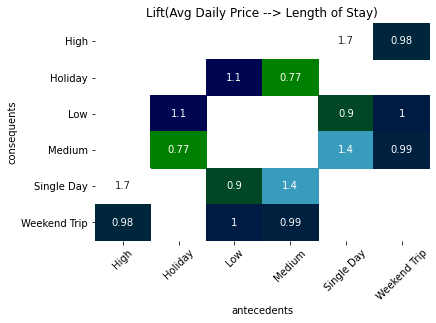

In [ ]:
# Heat Map
# Convert antecedents and consequents into strings
ruleslen_p['antecedents'] = ruleslen_p['antecedents'].apply(lambda a: ','.join(list(a)))
ruleslen_p['consequents'] = ruleslen_p['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = ruleslen_p.pivot(index='consequents', columns='antecedents',values='lift')

# Generate heatmap
sns.heatmap(support_table, annot=True, cbar=False, cmap='ocean')
plt.xticks(rotation = 45)
plt.title("Lift(Avg Daily Price --> Length of Stay)")

In [ ]:
# Length of Stay by Market Segment
dflen_m = df[['Extended','Holiday','Single Day', 'Weekend Trip','Groups', 'Corporate', 'Travel Agent/Operator', 'Other']]
frequent_itemsets = apriori(dflen_m, min_support=0.005, use_colnames=True)
from mlxtend.frequent_patterns import association_rules
ruleslen_m = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)
ruleslen_m.sort_values(by='lift',ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(Single Day),(Corporate),0.183896,0.031763,0.012395,0.067404,2.122093,0.006554,1.038217
9,(Corporate),(Single Day),0.031763,0.183896,0.012395,0.390244,2.122093,0.006554,1.338411
15,(Groups),(Weekend Trip),0.124631,0.491841,0.083426,0.669386,1.360980,0.022128,1.537016
14,(Weekend Trip),(Groups),0.491841,0.124631,0.083426,0.169620,1.360980,0.022128,1.054179
12,(Single Day),(Other),0.183896,0.686147,0.142982,0.777514,1.133160,0.016802,1.410666
13,(Other),(Single Day),0.686147,0.183896,0.142982,0.208383,1.133160,0.016802,1.030934
2,(Holiday),(Travel Agent/Operator),0.321358,0.157459,0.057280,0.178243,1.131998,0.006679,1.025292
3,(Travel Agent/Operator),(Holiday),0.157459,0.321358,0.057280,0.363776,1.131998,0.006679,1.066672
19,(Travel Agent/Operator),(Weekend Trip),0.157459,0.491841,0.085557,0.543358,1.104742,0.008112,1.112816
18,(Weekend Trip),(Travel Agent/Operator),0.491841,0.157459,0.085557,0.173952,1.104742,0.008112,1.019966


Text(0.5, 1.0, 'Lift(Market Segment --> Length of Stay)')

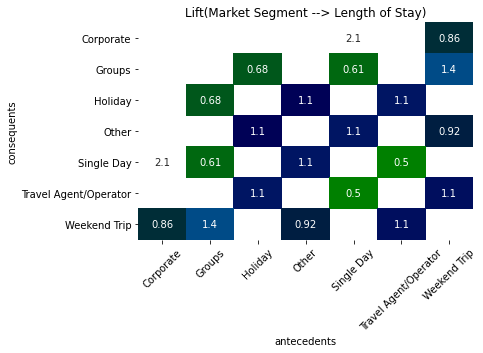

In [ ]:
# Heat Map
# Convert antecedents and consequents into strings
ruleslen_m['antecedents'] = ruleslen_m['antecedents'].apply(lambda a: ','.join(list(a)))
ruleslen_m['consequents'] = ruleslen_m['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = ruleslen_m.pivot(index='consequents', columns='antecedents',values='lift')

# Generate heatmap
sns.heatmap(support_table, annot=True, cbar=False, cmap='ocean')
plt.xticks(rotation = 45)
plt.title("Lift(Market Segment --> Length of Stay)")

# Scaling

Dropping non-numeric and useless columns

In [ ]:
#dropping non numeric
df_numeric = df_subset.drop(columns=["Nationality", "DistributionChannel", "MarketSegment", "ID"])
df_numeric.head(2)

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
64030,19.0,168,149.0,548.0,150.0,0,0,1,10,5,...,0,0,0,0,1,0,0,0,0,0
78719,56.0,58,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Scaling the Data

In [ ]:
#scaling data
sc=StandardScaler()
scaled_numeric = sc.fit_transform(df_numeric)
#put scaled values back into dataframe
df_scaled = pd.DataFrame(scaled_numeric, index=df_numeric.index, columns=df_numeric.columns)
df_scaled.head(2)

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
64030,-1.638244,-0.919556,0.948273,0.633491,0.764249,-0.034126,-0.025324,0.252784,1.168799,1.015505,...,-0.025659,-0.048356,-0.042399,-0.1168,1.369118,-0.405224,-0.017296,-0.060515,-0.010938,-0.31762
78719,0.647842,-1.269814,-0.750787,-0.758068,-0.622295,-0.034126,-0.025324,-1.005715,-1.016002,-0.913768,...,-0.025659,-0.048356,-0.042399,-0.1168,-0.730397,-0.405224,-0.017296,-0.060515,-0.010938,-0.31762


## Hierarchical Clustering

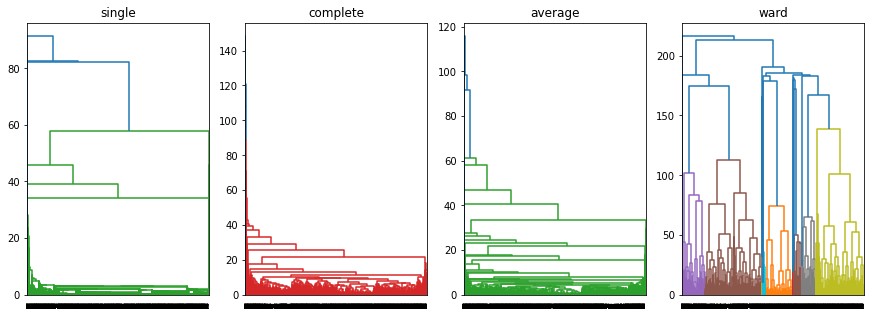

In [ ]:
# Loop to have all the methods at once with Euclidean distance (default) 
METHODS = ['single', 'complete', 'average', 'ward']
plt.figure(figsize=(15,5))


# loop and build our plot
for i, m in enumerate(METHODS):
  plt.subplot(1, 4, i+1)
  plt.title(m)
  dendrogram(linkage(df_scaled.values, method=m),
             labels = df_scaled.index,
             leaf_rotation=90, 
             leaf_font_size=2)
  
plt.show()

Computing best distance between Euclidean and Cosine

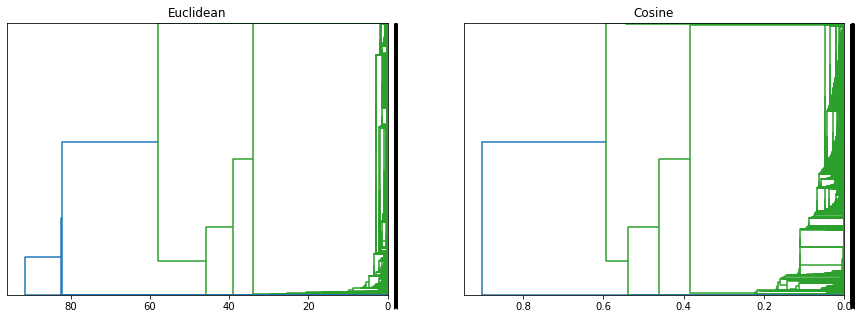

In [ ]:
diste = pdist(df_scaled.values)
distcos = pdist(df_scaled.values, metric="cosine")
hclust_e = linkage(diste)
hclust_c = linkage(distcos)
LINKS = [hclust_e, hclust_c]
TITLE = ['Euclidean', 'Cosine']
plt.figure(figsize=(15, 5))
# loop and build our plot
for i, m in enumerate(LINKS):
  plt.subplot(1, 2, i+1)
  plt.title(TITLE[i])
  dendrogram(m,
             leaf_rotation=90,
             orientation="left")
plt.show()

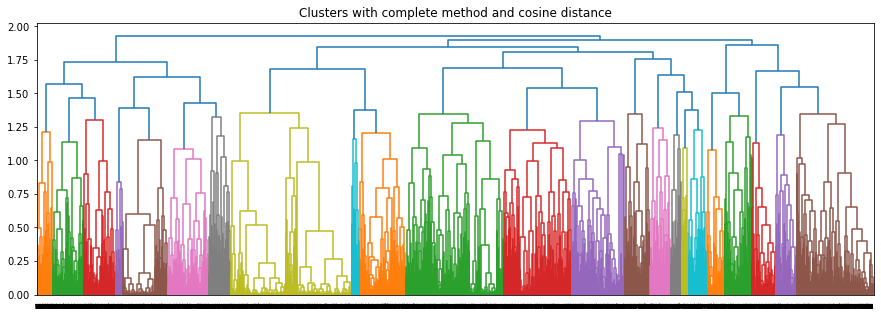

In [ ]:
# fit the complete hierarchical clustering model with Cosine distance
df_hclust = linkage(df_scaled, method='complete', metric = 'cosine')

# plot the dendrogram
plt.figure(figsize=(15,5))
dendrogram(df_hclust,
           labels = None,
           leaf_rotation=90,
           leaf_font_size=2)
plt.title("Clusters with complete method and cosine distance")
plt.show()

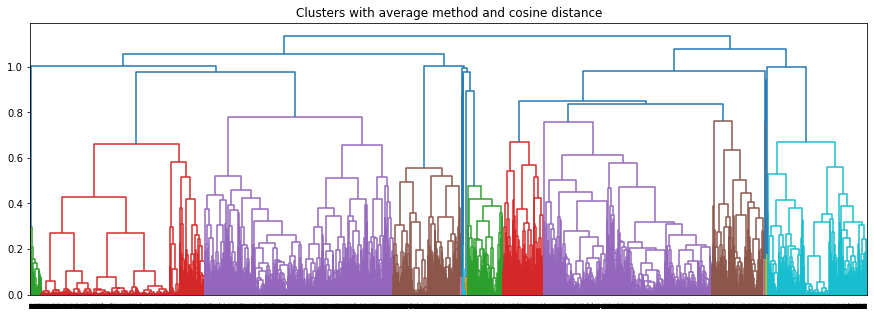

In [ ]:
# fit the average hierarchical clustering model with Cosine distance
df_hclust = linkage(df_scaled, method='average', metric = 'cosine')

# plot the dendrogram
plt.figure(figsize=(15,5))
dendrogram(df_hclust,
           labels = None,
           leaf_rotation=90,
           leaf_font_size=2)
plt.title("Clusters with average method and cosine distance")
plt.show()

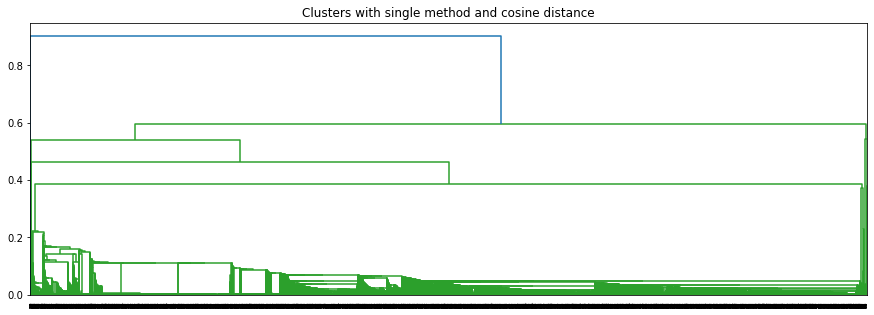

In [ ]:
# fit the single hierarchical clutering model with Cosine distance
df_hclust = linkage(df_scaled, method='single', metric = 'cosine')

# plot the dendrogram
plt.figure(figsize=(15,5))
dendrogram(df_hclust,
           labels = None,
           leaf_rotation=90,
           leaf_font_size=2)
plt.title("Clusters with single method and cosine distance")
plt.show()

# KMeans Baseline

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Silo Score'}>

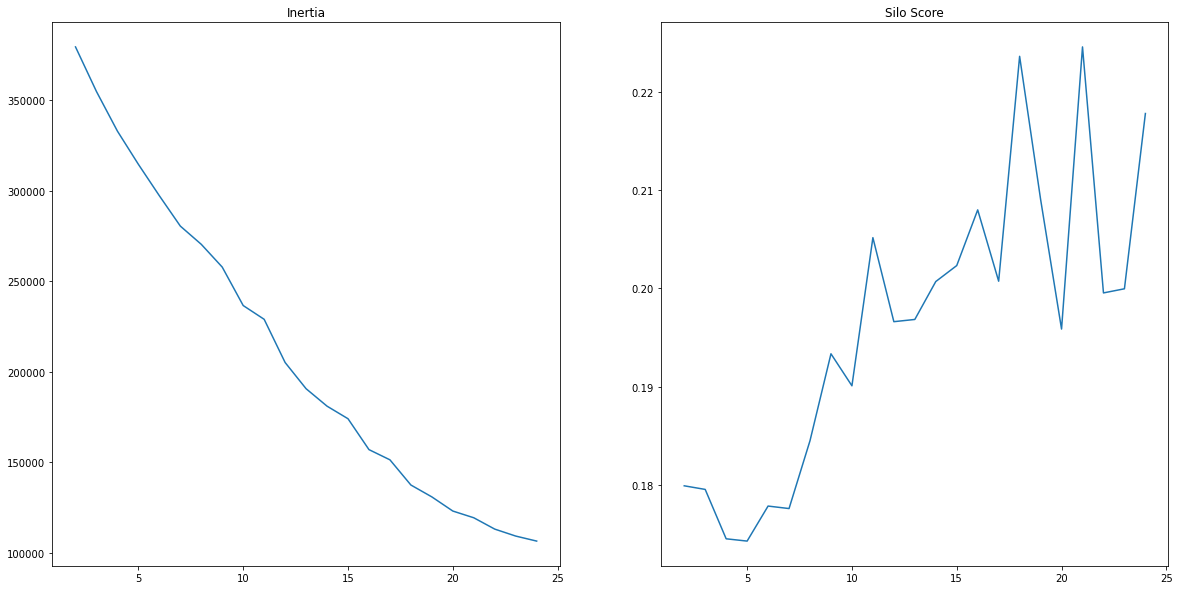

In [ ]:
kValues = range(2,25)
inertia = []
sil = []

for k in kValues:
  km = KMeans(k)
  km.fit(df_scaled)
  clusterLabels = km.predict(df_scaled)
  inertia.append(km.inertia_)
  sil.append(silhouette_score(df_scaled,clusterLabels))

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Inertia")
sns.lineplot(kValues, inertia)


plt.subplot(1,2,2)
plt.title("Silo Score")
sns.lineplot(kValues, sil)

In [ ]:
#13 looks good
df_scaled_Kmeans = df_scaled.copy()
kcluster = KMeans(13)
kcluster.fit(df_scaled_Kmeans)
kClusterLabels = kcluster.predict(df_scaled_Kmeans)

In [ ]:
df_KMeansProfile = df_numeric.copy()
df_KMeansProfile['Cluster_Assignment'] = kClusterLabels
df_KMeansProfile.head(2)

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Cluster_Assignment
64030,19.0,168,149.0,548.0,150.0,0,0,1,10,5,...,0,0,0,1,0,0,0,0,0,0
78719,56.0,58,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
#groupings
df_KMeansProfile.Cluster_Assignment.value_counts(sort=False)

0     4706
1     4905
2        2
3        5
4        7
5     4854
6        8
7       26
8      709
9       39
10    1369
11      59
12      29
Name: Cluster_Assignment, dtype: int64

In [ ]:
#trying to inspect clusters
df_KMeansProfile.groupby('Cluster_Assignment').mean().T

Cluster_Assignment,0,1,2,3,4,5,6,7,8,9,10,11,12
Age,48.358024,47.892896,28.000000,51.400000,41.914629,40.658303,44.22560,53.423077,43.081013,42.805190,45.487261,48.210210,48.048359
DaysSinceCreation,278.627709,827.824669,114.500000,344.400000,457.571429,278.089411,849.87500,426.461538,421.119887,350.307692,395.775749,431.322034,432.344828
AverageLeadTime,114.295198,78.375169,0.000000,54.800000,84.142857,7.203628,18.50000,76.500000,57.348378,53.615385,67.735573,52.983051,63.689655
LodgingRevenue,500.487133,323.947048,0.000000,234.280000,291.475714,49.910676,4278.21875,377.307692,307.318745,361.807692,359.059737,356.363559,430.092414
OtherRevenue,105.923241,88.551706,0.000000,30.060000,102.821429,6.591609,438.75000,74.211538,64.084513,96.751026,69.646304,111.367966,111.340000
BookingsCanceled,0.001700,0.003466,0.000000,0.000000,0.000000,0.001236,3.00000,0.000000,0.000000,0.000000,0.001461,0.033898,0.000000
BookingsNoShowed,0.000212,0.000612,0.000000,0.000000,0.000000,0.000412,1.12500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BookingsCheckedIn,1.051636,1.030581,0.000000,0.600000,1.142857,0.305521,22.62500,0.846154,0.734838,0.794872,0.758218,0.847458,0.655172
PersonsNights,7.119210,6.045464,0.000000,3.600000,5.571429,0.628142,37.25000,6.000000,4.864598,6.666667,5.000000,4.915254,6.344828
RoomNights,3.598385,3.007747,0.000000,2.400000,3.142857,0.406057,51.50000,2.923077,2.346968,3.205128,2.474069,2.508475,3.000000


PCA and KMeans

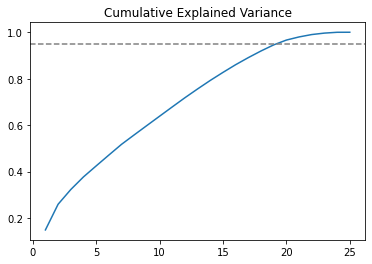

In [ ]:
#PCA
pca = PCA()
pcs = pca.fit_transform(df_scaled)
import matplotlib.pyplot as plt
varExplained = pca.explained_variance_ratio_
plt.title("Cumulative Explained Variance")
plt.plot(range(1, len(varExplained)+1), np.cumsum(varExplained))
plt.axhline(.95, ls='--', c='gray')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


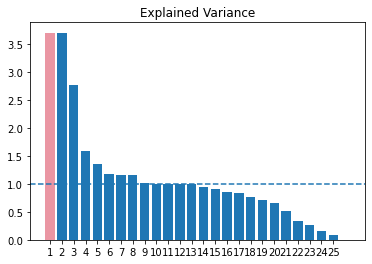

In [ ]:
#Eigenvalue
def ev_plot(ev):
  y = list(ev)
  x = list(range(1,len(ev)+1))
  return x, y
x, y = ev_plot(pca.explained_variance_)
sns.barplot(x, y)
plt.title("Explained Variance")
plt.bar(x=x, height=y)
plt.axhline(y=1, ls="--")

ev = pca.explained_variance_

In [ ]:
#choosing to retain 95% of componnents, will choose 14 PC
#14 bc good trade-off for eigenvalue and cummulative variance
newValuesPC = pcs[:, :14]
#we have all rows of data, and the reconstructed features, or x variables!
newValuesPC.shape

(16718, 14)

In [ ]:
#populating a new dataframe with the new PCA constructed columns
dfPC = pd.DataFrame(newValuesPC, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13", "PC14"], index=df_numeric.index)
dfPC

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
64030,1.166292,2.532267,-0.326900,-1.037277,-0.904735,0.172355,0.332210,-0.127663,-0.297026,-0.008720,0.150309,0.015949,-0.281478,0.410968
78719,-2.151779,0.133996,0.238848,0.570494,0.062430,-0.164936,0.339307,0.132222,-0.078812,0.042985,-0.062771,-0.130397,-0.268773,-0.004386
5428,1.574486,-2.702579,-0.200236,0.069159,-0.498062,0.100805,-0.066621,-0.041322,-0.227944,-0.053037,0.033083,-0.025671,-0.181409,0.214860
988,3.663574,-2.599664,-1.347438,-0.297659,-0.899615,0.257235,-0.307661,-0.075573,-0.555362,-0.034778,0.220607,0.038177,-0.188756,0.650911
43623,0.078693,0.980225,-0.181370,1.745017,-0.442128,0.289414,-1.551782,-0.406822,-0.153167,0.020627,0.095556,0.118872,0.325939,0.296390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80141,-0.979413,2.944596,0.189592,-1.326154,1.368971,-0.444148,0.797996,-0.062709,0.479357,-0.297184,0.049649,0.970988,2.262482,-0.243090
916,-0.049705,-3.642284,0.447507,0.409840,0.251806,-0.186135,0.413876,0.119741,0.065657,-0.022632,-0.113672,-0.110815,-0.186963,-0.073596
8953,1.197829,-2.554897,-1.300102,2.424236,1.426224,-0.507086,-0.156521,0.304068,0.886737,0.160959,-0.553683,-0.061538,0.218503,-1.199095
41622,4.001326,1.972384,-2.020508,-0.516575,-2.089760,0.661181,-1.072732,-0.373695,-1.180091,-0.052591,0.543171,0.229766,-0.205098,1.321746


Clustering

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Silo Score'}>

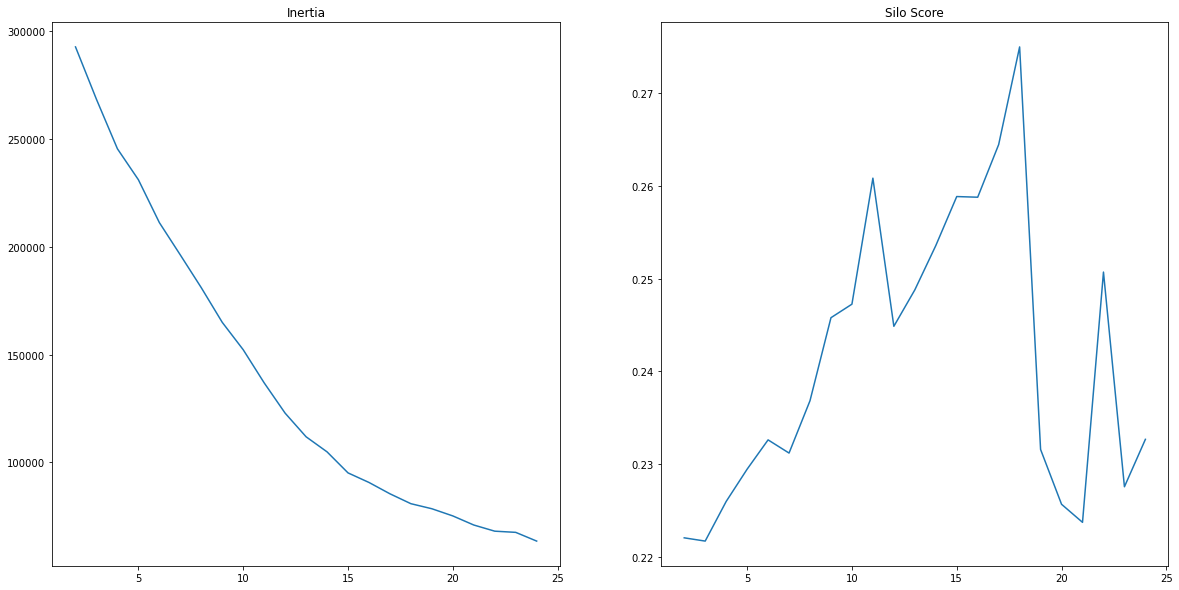

In [ ]:
#observing different clusters and trying to find a balance between inertia and silohouette score
kValues = range(2,25)
inertia = []
sil = []

for k in kValues:
  km = KMeans(k)
  km.fit(dfPC)
  clusterLabels = km.predict(dfPC)
  inertia.append(km.inertia_)
  sil.append(silhouette_score(dfPC,clusterLabels))

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Inertia")
sns.lineplot(kValues, inertia)


plt.subplot(1,2,2)
plt.title("Silo Score")
sns.lineplot(kValues, sil)

In [ ]:
#KMeans clutering
#10 seems ok to minimize intertia and maximize silo score
kcluster = KMeans(10)
kcluster.fit(dfPC)
kClusterLabels = kcluster.predict(dfPC)

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

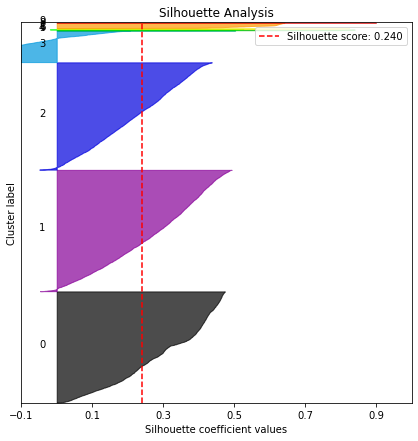

In [ ]:
skplt.metrics.plot_silhouette(dfPC, kcluster.predict(dfPC), figsize=(7,7))

In [ ]:
#put back on dataframe

dfPC['Cluster_Assignment'] = kClusterLabels
dfPC.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,Cluster_Assignment
64030,1.166292,2.532267,-0.326900,-1.037277,-0.904735,0.172355,0.332210,-0.127663,-0.297026,-0.008720,0.150309,0.015949,-0.281478,0.410968,2
78719,-2.151779,0.133996,0.238848,0.570494,0.062430,-0.164936,0.339307,0.132222,-0.078812,0.042985,-0.062771,-0.130397,-0.268773,-0.004386,0
5428,1.574486,-2.702579,-0.200236,0.069159,-0.498062,0.100805,-0.066621,-0.041322,-0.227944,-0.053037,0.033083,-0.025671,-0.181409,0.214860,1
988,3.663574,-2.599664,-1.347438,-0.297659,-0.899615,0.257235,-0.307661,-0.075573,-0.555362,-0.034778,0.220607,0.038177,-0.188756,0.650911,1
43623,0.078693,0.980225,-0.181370,1.745017,-0.442128,0.289414,-1.551782,-0.406822,-0.153167,0.020627,0.095556,0.118872,0.325939,0.296390,2


In [ ]:
dfPC.Cluster_Assignment.value_counts(sort=False)

0    4920
1    5369
2    4747
3    1384
4       7
5      26
6      12
7      29
8     222
9       2
Name: Cluster_Assignment, dtype: int64

In [ ]:
PCA_KMeans_Profile = pd.concat(([df_numeric,dfPC]), axis=1)
PCA_KMeans_Profile.head()
PCA_KMeans_Profile.groupby('Cluster_Assignment').mean().T.head(25)

Cluster_Assignment,0,1,2,3,4,5,6,7,8,9
Age,40.377194,48.166336,48.509897,45.713493,42.543543,53.423077,45.866867,48.048359,28.938804,28.000000
DaysSinceCreation,273.977846,812.621904,243.999368,476.953035,819.714286,426.461538,410.416667,432.344828,327.945946,114.500000
AverageLeadTime,5.088050,81.179029,100.457427,108.859104,20.714286,76.500000,71.916667,63.689655,33.621622,0.000000
LodgingRevenue,35.354148,297.368510,371.913762,969.167934,4858.107143,377.307692,267.644167,430.092414,243.238153,0.000000
OtherRevenue,4.408533,74.449581,70.290727,249.902377,496.785714,74.211538,72.504167,111.340000,67.702793,0.000000
BookingsCanceled,0.000203,0.002608,0.002107,0.007225,3.428571,0.000000,0.000000,0.000000,0.000000,0.000000
BookingsNoShowed,0.000000,0.001118,0.000211,0.000723,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BookingsCheckedIn,0.218089,1.016018,1.027175,1.159682,25.714286,0.846154,0.916667,0.655172,0.536036,0.000000
PersonsNights,0.447358,5.562488,5.527070,12.831647,42.142857,6.000000,4.750000,6.344828,4.459459,0.000000
RoomNights,0.282724,2.830136,2.952391,5.763728,58.428571,2.923077,2.833333,3.000000,1.833333,0.000000


TSNE and KMeans

In [ ]:
pca_tsne = PCA(n_components=14)
df_scaled_TSNE = df_scaled.copy()
pcs_tsne = pca.fit_transform(df_scaled_TSNE)
from sklearn.manifold import TSNE
tsne=TSNE()
tsne.fit(pcs_tsne)

te = tsne.embedding_
te.shape

tsne_df = pd.DataFrame(te, columns=["E1", "E2"])
tsne_df.head()

,E1,E2
0,13.846067,27.283300
1,-34.255543,63.228065
2,-49.876171,-3.385452
3,-52.634556,-22.362909
4,41.751102,-64.006836


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Silo Score'}>

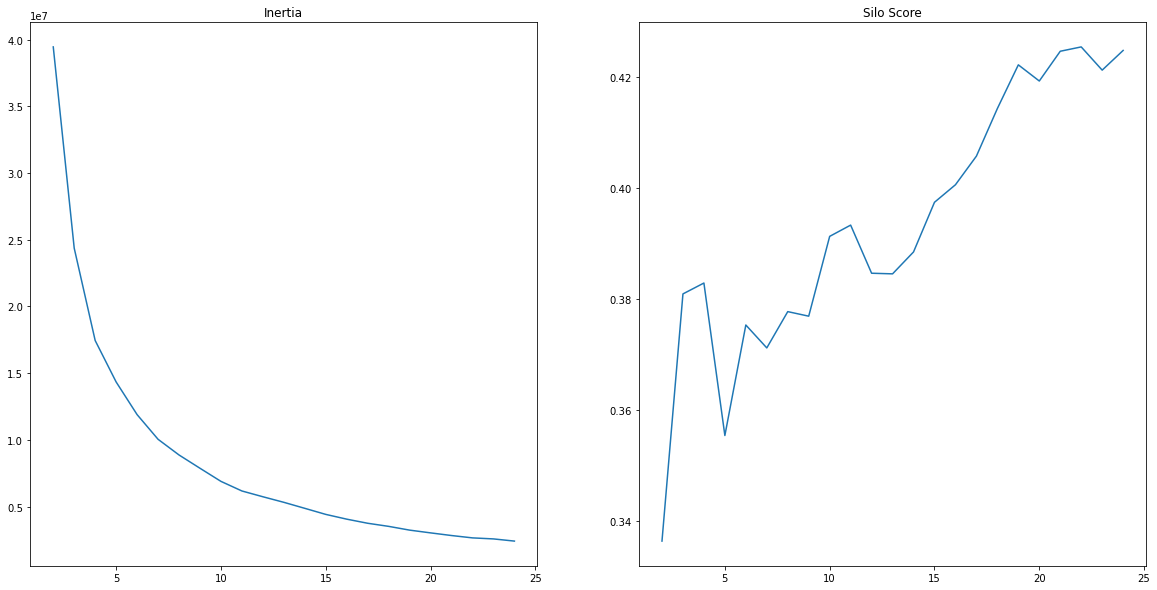

In [ ]:
kValues = range(2,25)
inertia = []
sil = []

for k in kValues:
  km = KMeans(k)
  km.fit(tsne_df)
  clusterLabels = km.predict(tsne_df)
  inertia.append(km.inertia_)
  sil.append(silhouette_score(tsne_df,clusterLabels))

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Inertia")
sns.lineplot(kValues, inertia)


plt.subplot(1,2,2)
plt.title("Silo Score")
sns.lineplot(kValues, sil)

In [ ]:
kcluster = KMeans(10)
kcluster.fit(tsne_df)
kClusterLabels = kcluster.predict(tsne_df)
tsne_df['Cluster_Assignment'] = kClusterLabels
tsne_df.head()

,E1,E2,Cluster_Assignment
0,13.846067,27.283300,8
1,-34.255543,63.228065,6
2,-49.876171,-3.385452,1
3,-52.634556,-22.362909,1
4,41.751102,-64.006836,5


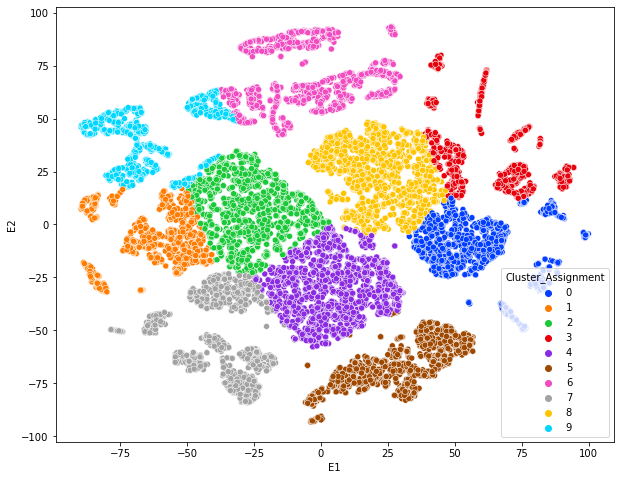

In [ ]:
PAL = sns.color_palette("bright", 10)
plt.figure(figsize=(10,8))
sns.scatterplot(x="E1", y="E2", hue="Cluster_Assignment", data=tsne_df, legend="full", palette=PAL)
plt.show()

In [ ]:
#put back on dataframe
df_tsnePCA_KMeans = df_numeric.copy()
df_tsnePCA_KMeans['Cluster_Assignment'] = kClusterLabels
df_tsnePCA_KMeans.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Cluster_Assignment
64030,19.000000,168,149.0,548.0,150.0,0,0,1,10,5,...,0,0,0,1,0,0,0,0,0,8
78719,56.000000,58,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
5428,45.402401,976,62.0,310.7,136.0,0,0,1,8,4,...,0,0,0,0,0,0,0,0,0,1
988,62.000000,1058,13.0,1660.0,345.5,0,0,1,8,4,...,0,0,0,0,0,0,0,0,0,1
43623,30.000000,351,50.0,369.0,69.5,0,0,1,6,3,...,0,0,0,0,1,0,0,0,0,5


In [ ]:
# grouping
df_tsnePCA_KMeans.Cluster_Assignment.value_counts(sort=False)

0    1682
1    1338
2    1985
3    1253
4    2298
5    1491
6    1824
7    1593
8    2055
9    1199
Name: Cluster_Assignment, dtype: int64

In [ ]:
df_tsnePCA_KMeans.groupby('Cluster_Assignment').mean().T

Cluster_Assignment,0,1,2,3,4,5,6,7,8,9
Age,42.873726,42.804502,45.106694,45.246694,46.055174,48.694818,36.224069,47.682153,48.803174,53.827569
DaysSinceCreation,697.123662,701.159193,726.463476,546.906624,231.724108,532.354125,184.816338,475.533584,332.807299,245.054212
AverageLeadTime,59.061831,90.580717,33.592042,82.602554,65.106881,116.755869,1.623904,116.469554,94.645742,2.760634
LodgingRevenue,281.053561,257.337242,251.715335,219.284589,394.657502,382.860174,9.367188,456.519209,564.338438,14.633336
OtherRevenue,67.595071,76.666966,55.901144,50.190974,63.564465,90.064024,1.921880,98.410672,141.484019,3.313044
BookingsCanceled,0.000000,0.000000,0.000000,0.000000,0.001741,0.000000,0.000000,0.000000,0.026764,0.000000
BookingsNoShowed,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007299,0.000000
BookingsCheckedIn,0.847800,0.714499,1.027204,0.718276,1.032202,1.018109,0.021930,0.983051,1.190268,0.080901
PersonsNights,5.372176,5.263827,4.277078,3.553073,5.182332,6.091885,0.138706,7.000000,7.798540,0.251043
RoomNights,2.546968,2.510463,2.424181,1.837191,2.955178,2.903421,0.068531,3.344633,3.927981,0.157631


# DBSCAN for Clustering

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [ ]:
# Checking df_scaled has correct rows and columns
print(df_scaled.shape)
df_scaled.info()

(16718, 25)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16718 entries, 64030 to 28176
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   16718 non-null  float64
 1   DaysSinceCreation     16718 non-null  float64
 2   AverageLeadTime       16718 non-null  float64
 3   LodgingRevenue        16718 non-null  float64
 4   OtherRevenue          16718 non-null  float64
 5   BookingsCanceled      16718 non-null  float64
 6   BookingsNoShowed      16718 non-null  float64
 7   BookingsCheckedIn     16718 non-null  float64
 8   PersonsNights         16718 non-null  float64
 9   RoomNights            16718 non-null  float64
 10  DaysSinceLastStay     16718 non-null  float64
 11  DaysSinceFirstStay    16718 non-null  float64
 12  SRHighFloor           16718 non-null  float64
 13  SRLowFloor            16718 non-null  float64
 14  SRAccessibleRoom      16718 non-null  float64
 15  SRM

### Methodology:
We need following parameters for DBSCAN model:

1.   **eps:** Get a range for epsilon using NearestNeighbours, then iterate through this range to generate DBSCAN model silhouette scores and chose the eps that maximizes the silohouette score
2.   **min_samples:** Take number of clusters from KMeans method as desired number of cluster. Iterate through a range of min_Samples using eps from previous step and chose the one that gives the desired number of clusters.

Reference: *https://medium.com/@mohantysandip/a-step-by-step-approach-to-solve-dbscan-algorithms-by-tuning-its-hyper-parameters-93e693a91289*

#### Finding eps

In [ ]:
# we use NearestNeighbors to get distances for a closest point

nb = NearestNeighbors(5) # similar results with 2
nbrs = nb.fit(df_scaled)

# get the distances to closest point and the indices for each row
distances, indices = nbrs.kneighbors(df_scaled)

# sort the rows
distances = np.sort(distances, axis=0)

# we can use the distance
# the first "column" is 0, or itself
distances = distances[:,1]

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 4.0)

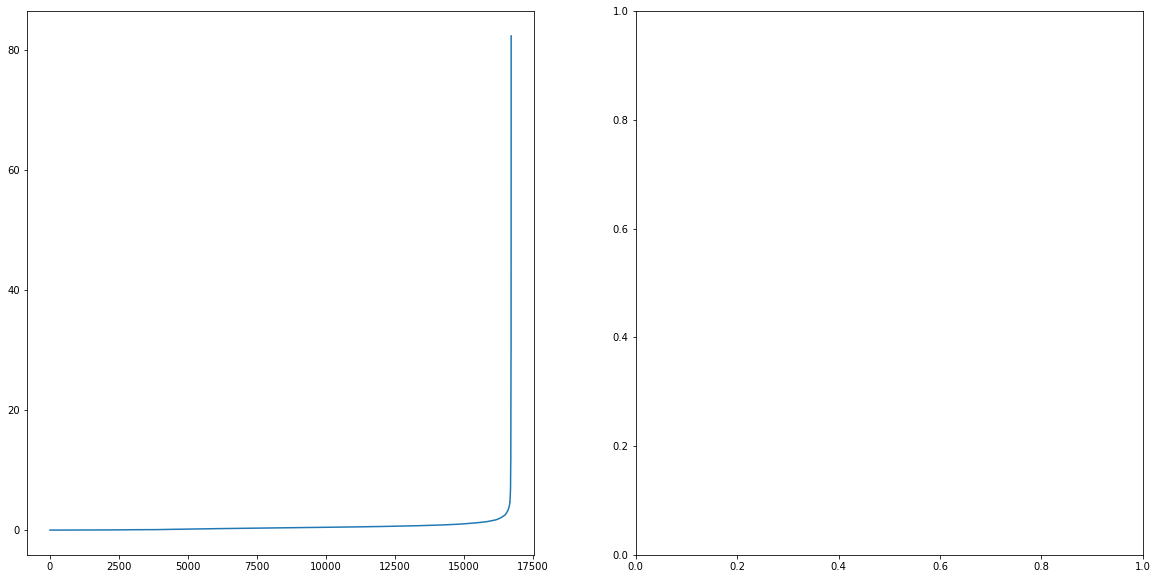

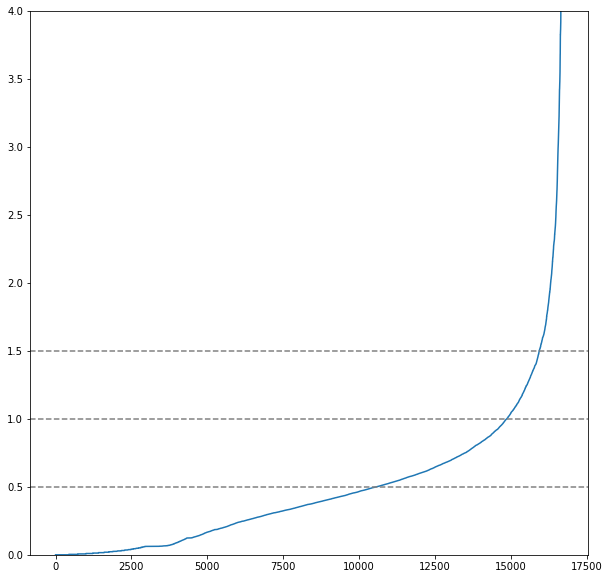

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.lineplot(range(len(distances)), distances)

# Zooming in to get the elbow point
plt.subplot(1,2,2)
plt.figure(figsize=(10,10))
sns.lineplot(range(len(distances)), distances)
# plt.axvline(x=15000, ls='--', color='gray')
plt.axhline(y=0.5, ls='--', color='gray')
plt.axhline(y=1, ls='--', color='gray')
plt.axhline(y=1.5, ls='--', color='gray')
plt.ylim([0,4])

From the elbow plot above we know eps should be between 0.5 to 1.5, we will generate the silhoutte score for all eps between these values and get the one with highest silhouette score. 


For eps value 0.5 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, -1} the avg silo score is  -0.28637587296594225
For eps value 0.6 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53

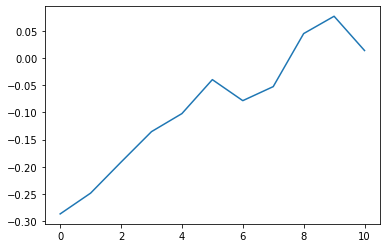

In [ ]:
range_eps = [0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5]
silhouette_avg_esp = []
for e in range_eps:
    # print('eps value is: '+str(e))
    dbn = DBSCAN(eps=e, min_samples=5).fit(df_scaled) # min_samples is still default
    core_samples_mask = np.zeros_like(dbn.labels_, dtype='bool')
    core_samples_mask[dbn.core_sample_indices_] = True
    labels = dbn.labels_
    # print(set(labels))
    silhouette_avg = silhouette_score(df_scaled, labels)
    silhouette_avg_esp.append(silhouette_avg)
    print('For eps value '+str(e), set(labels), 'the avg silo score is ', silhouette_avg)

plt.plot(silhouette_avg_esp)

We see that the silhouette score is still increasing thus we get the values for higher epsilons too

For eps value 1 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, -1} the avg silo score is  -0.0397651559439533
For eps value 2 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, -1} the avg silo score is  0.094973935541823
For eps value 3 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, -1} the avg silo score is  0.22845905407578931
For eps value 4 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, -1} the avg silo score is  0.3344634474961693
For eps value 5 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1} the avg silo score is  0.5331542491305955
For eps value 6 {0, 1, 2, 3, 4, 5, 6, 7, 8, -1} the avg silo score is  0.5350742452316132
For eps value 7 {0, 1, 2, 3, 4, 5, 6, 7, 8, -1} the avg silo score is  0.5349709439837245
For eps value 8 {0, 1, 2, 3, 4, 5, 6, 7, 8, -1} the avg silo score is  0.5349932924411696
For eps valu

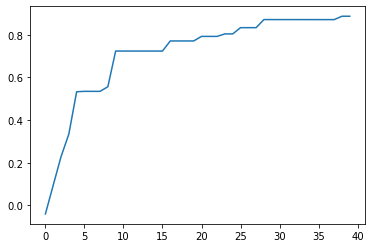

In [ ]:
range_eps_newer = range(1,41)
silhouette_avg_esp_new = []
for e in range_eps_newer:
    # print('eps value is: '+str(e))
    dbn = DBSCAN(eps=e, min_samples=5).fit(df_scaled) # min_samples is still default
    core_samples_mask = np.zeros_like(dbn.labels_, dtype='bool')
    core_samples_mask[dbn.core_sample_indices_] = True
    labels = dbn.labels_
    # print(set(labels))
    silhouette_avg = silhouette_score(df_scaled, labels)
    silhouette_avg_esp_new.append(silhouette_avg)
    print('For eps value '+str(e), set(labels), 'the avg silo score is ', silhouette_avg)
    
plt.plot(silhouette_avg_esp_new)

#### Finding min_sample

In [ ]:
# eps = 1.4
range_min_samples = range(1,60)
clusters_m1 = []
for m in range_min_samples:
    # print('min_samples value is: '+str(m))
    dbn = DBSCAN(eps=1.4, min_samples=m).fit(df_scaled) # min_samples is still default
    core_samples_mask = np.zeros_like(dbn.labels_, dtype='bool')
    core_samples_mask[dbn.core_sample_indices_] = True
    # ignoring label '-1' as it is for the ouliers
    labels = set([label for label in dbn.labels_ if label >= 0])
    # print(set(labels))
    print('For min_samples value '+str(m), set(labels), 'Total no. of clusters are ', str(len(set(labels))))
    clusters_m1.append(len(set(labels)))

For min_samples value 1 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 

In [ ]:
# eps = 4.6
range_min_samples = range(1,10)
clusters_m2 = []
for m in range_min_samples:
    # print('min_samples value is: '+str(m))
    dbn = DBSCAN(eps=4.6, min_samples=m).fit(df_scaled) # min_samples is still default
    core_samples_mask = np.zeros_like(dbn.labels_, dtype='bool')
    core_samples_mask[dbn.core_sample_indices_] = True
    # ignoring label '-1' as it is for the ouliers
    labels = set([label for label in dbn.labels_ if label >= 0])
    # print(set(labels))
    print('For min_samples value '+str(m), set(labels), 'Total no. of clusters are ', str(len(set(labels))))
    clusters_m2.append(len(set(labels)))

For min_samples value 1 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67} Total no. of clusters are  68
For min_samples value 2 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17} Total no. of clusters are  18
For min_samples value 3 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14} Total no. of clusters are  15
For min_samples value 4 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15} Total no. of clusters are  16
For min_samples value 5 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12} Total no. of clusters are  13
For min_samples value 6 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11} Total no. of clusters are  12
For min_samples value 7 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} Total no. of clusters are  10
For min_samples value 8 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} Total no. of clusters 

#### Thus two possible combos:

For eps between 0.5 to 1.5
eps value is: 1.4,
the avg silo score is  0.07664003487707476

Then maximizing Silo score
eps value is: 4.6
the avg silo score is  0.3350374834570083

Beyond this eps, while the Silo score increases the number of clusters decreases

Thus

1. eps = 1.4, min_samples = 56
2. eps = 4.6, min_samples = 5

#### 1. eps = 1.4, min_samples = 56

In [ ]:
# 1. eps = 1.4, min_samples = 56
dbf1 = DBSCAN(eps=1.4, min_samples=56) # default
dbcf1 = dbf1.fit_predict(df_scaled)

In [ ]:
# Adding back to numeric data and generating cluster averages
df_n_db1 = df_numeric.copy()
df_n_db1['dbf1_clusters'] = dbcf1
#groupings
df_n_db1.dbf1_clusters.value_counts(sort=False)

 0     1513
 1     5363
 2     1099
 3     2963
 4      495
 5      166
 6       94
 7     1047
 8      132
 9      156
 10     176
 11      76
 12      57
-1     3381
Name: dbf1_clusters, dtype: int64

In [ ]:
# Cluster summary/profile
df_n_db1.groupby('dbf1_clusters').mean().T

dbf1_clusters,-1,0,1,2,3,4,5,6,7,8,9,10,11,12
Age,45.930334,38.958938,46.934135,48.279831,46.879200,41.710347,40.489272,39.289438,41.659829,37.562176,47.844903,44.700177,49.973684,74.456140
DaysSinceCreation,458.310263,169.586252,549.861458,561.812557,523.776915,178.260606,161.921687,193.563830,175.649475,150.196970,726.903846,1054.778409,643.052632,478.122807
AverageLeadTime,102.129547,0.000000,71.170952,100.666970,75.546743,0.000000,0.000000,0.000000,0.000000,0.000000,48.416667,0.000000,63.815789,471.105263
LodgingRevenue,611.141227,0.000000,296.010886,295.571438,314.827283,0.000000,0.000000,0.000000,0.000000,0.000000,289.602500,0.000000,326.535658,164.582456
OtherRevenue,155.119163,0.000000,59.363912,62.883385,65.754495,0.000000,0.000000,0.000000,0.000000,0.000000,53.565962,0.000000,61.966184,99.105263
BookingsCanceled,0.017450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BookingsNoShowed,0.004437,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BookingsCheckedIn,1.060041,0.000000,1.007459,1.003640,1.005737,0.000000,0.000000,0.000000,0.000000,0.000000,1.006410,0.000000,1.000000,1.000000
PersonsNights,8.041704,0.000000,4.990677,5.360328,5.579143,0.000000,0.000000,0.000000,0.000000,0.000000,4.461538,0.000000,5.842105,4.000000
RoomNights,3.866016,0.000000,2.725527,2.592357,2.800877,0.000000,0.000000,0.000000,0.000000,0.000000,2.532051,0.000000,3.013158,2.298246


#### 2. eps = 4.6, min_samples = 5

In [ ]:
# 1. eps = 4.6, min_samples = 5
dbf2 = DBSCAN(eps=4.6, min_samples=5) # default
dbcf2 = dbf2.fit_predict(df_scaled)

In [ ]:
# Adding back to numeric data and generating cluster averages
df_n_db2 = df_numeric.copy()
df_n_db2['dbf2_clusters'] = dbcf2
#groupings
df_n_db2.dbf2_clusters.value_counts(sort=False)

 0     15567
 1       207
 2       696
 3        25
 4        17
 5        27
 6        31
 7        11
 8        22
 9         5
 10       26
 11        6
 12        7
-1        71
Name: dbf2_clusters, dtype: int64

In [ ]:
# CLuster summary/profile
df_n_db2.groupby('dbf2_clusters').mean().T

dbf2_clusters,-1,0,1,2,3,4,5,6,7,8,9,10,11,12
Age,48.273442,45.805033,28.948862,43.418733,53.240000,51.706589,41.755644,46.980723,23.090909,50.245564,37.28048,49.076923,53.000000,42.285714
DaysSinceCreation,592.873239,459.696859,336.458937,423.885057,431.800000,553.411765,334.814815,311.064516,240.000000,394.318182,544.60000,539.423077,526.000000,522.428571
AverageLeadTime,53.323944,66.874017,32.173913,57.843391,77.800000,11.470588,43.185185,47.967742,23.818182,53.090909,90.60000,56.730769,83.500000,48.428571
LodgingRevenue,1632.924085,292.968521,244.387778,307.876106,355.200000,204.176471,329.604444,287.188710,75.809091,217.853636,244.41800,314.726923,308.306667,333.390000
OtherRevenue,510.852394,65.474453,69.444541,64.030776,66.700000,32.508824,101.084815,63.122903,18.772727,44.884545,87.90000,59.565385,87.500000,59.357143
BookingsCanceled,0.591549,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
BookingsNoShowed,0.211268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
BookingsCheckedIn,5.000000,0.786086,0.531401,0.734195,0.840000,1.823529,0.777778,0.645161,0.454545,0.545455,1.20000,0.769231,1.000000,0.714286
PersonsNights,15.676056,4.593114,4.487923,4.862069,5.760000,3.000000,6.925926,4.516129,1.181818,3.818182,3.80000,4.346154,4.500000,5.571429
RoomNights,13.281690,2.325946,1.855072,2.353448,2.800000,2.470588,3.222222,2.064516,0.545455,1.818182,2.40000,2.346154,2.500000,3.000000
